In [1]:
%matplotlib inline

import feather
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import time
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import pickle



with open ('/home/aris/Desktop/image_survey_metrics.pickle', 'rb') as f:
    image_survey_metrics = pickle.load(f)
    
print 'The last year dataframe has '+ str(len(image_survey_metrics['user_id'].unique()))+' users.'
print image_survey_metrics.shape


The last year dataframe has 107 users.
(513714, 75)


In [2]:
survey_df = feather.read_dataframe('data_science_case/survey.feather')

In [3]:
survey_df.born.head()

0    1975
1    1978
2    1980
3    1959
4    1990
Name: born, dtype: int32

In [4]:
survey_df.columns

Index([u'id', u'gender', u'born', u'education', u'employed', u'income', u'A_2',
       u'N_1', u'P_1', u'E_1', u'A_1', u'H_1', u'M_1', u'R_1', u'M_2', u'E_2',
       u'LON', u'H_2', u'P_2', u'N_2', u'A_3', u'N_3', u'E_3', u'H_3', u'R_2',
       u'M_3', u'R_3', u'P_3', u'HAP', u'participate', u'insta_user_id',
       u'completed', u'start_q', u'end_q', u'network_id', u'P', u'E', u'R',
       u'M', u'A', u'PERMA', u'N_EMO', u'P_EMO', u'imagecount',
       u'private_account'],
      dtype='object')

In [5]:
face_df = feather.read_dataframe('data_science_case/face.feather')
face_df.head()

#features= ['emo_confidence']

,image_id,face_id,face_gender,face_gender_confidence,face_age_range_high,face_age_range_low,face_sunglasses,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,face_emo,emo_confidence
0,1003944279371027183_703978203,6.0,Female,98.741425,38.0,20.0,False,False,99.998474,False,99.999794,False,99.916168,True,95.395546,SAD,12.660271
1,1003944279371027183_703978203,6.0,Female,98.741425,38.0,20.0,False,False,99.998474,False,99.999794,False,99.916168,True,95.395546,CALM,8.252973
2,1003944279371027183_703978203,6.0,Female,98.741425,38.0,20.0,False,False,99.998474,False,99.999794,False,99.916168,True,95.395546,SURPRISED,24.634266
3,1003944279371027183_703978203,68.0,Male,99.927521,77.0,57.0,False,False,99.981598,False,99.993256,False,84.395294,True,99.420914,HAPPY,53.603287
4,1003944279371027183_703978203,68.0,Male,99.927521,77.0,57.0,False,False,99.981598,False,99.993256,False,84.395294,True,99.420914,SAD,5.509090


In [6]:
face_df.columns

Index([u'image_id', u'face_id', u'face_gender', u'face_gender_confidence',
       u'face_age_range_high', u'face_age_range_low', u'face_sunglasses',
       u'face_beard', u'face_beard_confidence', u'face_mustache',
       u'face_mustache_confidence', u'face_smile', u'face_smile_confidence',
       u'eyeglasses', u'eyeglasses_confidence', u'face_emo',
       u'emo_confidence'],
      dtype='object')

In [7]:
face_df.face_emo.unique()

array([u'SAD', u'CALM', u'SURPRISED', u'HAPPY', u'ANGRY', u'CONFUSED',
       u'DISGUSTED'], dtype=object)

In [8]:
imgid_uid = image_survey_metrics[['user_id','image_id']].drop_duplicates() #set a matrix
get_uid_from_imgid = imgid_uid.set_index('image_id').to_dict()['user_id'] # img_id -> uid
get_imgids_from_uid = {k: list(v) for k,v in imgid_uid.groupby('user_id')["image_id"]}

In [9]:
# create dummy variables using get_dummies
emotions_images = pd.get_dummies(image_survey_metrics.face_emo).iloc[:, 1:]

In [10]:
emotions_images  = pd.concat([image_survey_metrics[['user_id','PERMA']], emotions_images ], axis=1)

print emotions_images.shape
emotions_images.head()

(513714, 8)


,user_id,PERMA,CALM,CONFUSED,DISGUSTED,HAPPY,SAD,SURPRISED
0,53918317.0,5.0,1,0,0,0,0,0
1,53918317.0,5.0,0,0,0,1,0,0
2,53918317.0,5.0,0,0,0,0,0,1
3,53918317.0,5.0,1,0,0,0,0,0
4,53918317.0,5.0,0,0,0,1,0,0


In [11]:
test = pd.DataFrame(emotions_images.groupby(['user_id','PERMA']).agg({'CALM': sum, 'CONFUSED': sum, 'DISGUSTED': sum,'HAPPY': sum,'SAD': sum,'SURPRISED': sum})).reset_index()    # get the 

In [12]:
test.drop_duplicates
print test.shape

test.loc[test['user_id']==53918317.0]
test.head()

(108, 8)


,user_id,PERMA,CONFUSED,SAD,CALM,DISGUSTED,SURPRISED,HAPPY
0,1619510.0,4.181818,1485.0,795.0,1150.0,75.0,430.0,2015.0
1,2829661.0,7.454545,0.0,160.0,0.0,0.0,160.0,0.0
2,3069744.0,5.454545,50.0,150.0,50.0,0.0,100.0,200.0
3,3988856.0,7.818182,115.0,460.0,170.0,80.0,305.0,560.0
4,6734387.0,6.181818,485.0,790.0,520.0,40.0,305.0,1270.0


In [13]:
#test['total_pictures'] = test.sum([axis=1)
test['total_pictures'] = test['CALM']+test['CONFUSED']+test['DISGUSTED']+test['HAPPY']+test['SAD']+test['SURPRISED']

test

,user_id,PERMA,CONFUSED,SAD,CALM,DISGUSTED,SURPRISED,HAPPY,total_pictures
0,1.619510e+06,4.181818,1485.0,795.0,1150.0,75.0,430.0,2015.0,5950.0
1,2.829661e+06,7.454545,0.0,160.0,0.0,0.0,160.0,0.0,320.0
2,3.069744e+06,5.454545,50.0,150.0,50.0,0.0,100.0,200.0,550.0
3,3.988856e+06,7.818182,115.0,460.0,170.0,80.0,305.0,560.0,1690.0
4,6.734387e+06,6.181818,485.0,790.0,520.0,40.0,305.0,1270.0,3410.0
5,7.410944e+06,7.590909,1055.0,780.0,345.0,280.0,815.0,1640.0,4915.0
6,8.854187e+06,6.363636,1860.0,1395.0,505.0,180.0,1760.0,2275.0,7975.0
7,1.152083e+07,6.681818,180.0,340.0,145.0,85.0,265.0,440.0,1455.0
8,1.374595e+07,6.954545,1975.0,1325.0,835.0,910.0,1140.0,3440.0,9625.0
9,1.810819e+07,6.727273,35.0,0.0,65.0,0.0,60.0,95.0,255.0


In [14]:
#test.reset_index(inplace=True)

In [15]:
print test.shape
print image_survey_metrics.shape

(108, 9)
(513714, 75)


In [16]:
# test = pd.merge(image_survey_metrics[['user_id','PERMA']], test , how='right', on='user_id')

# print test.shape
# test.head()

In [17]:
test.drop_duplicates
test.shape

(108, 9)

In [18]:
def subtrack_features(main_list, subtr_features):
    
    new = [item for item in main_list if item not in subtr_features]
    
    return new

def prepare_set_statmodel(features):
    
    return 'PERMA~'+ '+'.join(features)


def regression_stats(formula,data):
    # create a fitted model with all three features
    lm = smf.ols(formula= formula, data=data).fit()
    print lm.params
    return lm
    

In [19]:
#Add the features of the metrics to the main features list
features = ['CALM','CONFUSED','DISGUSTED','HAPPY','SAD','SURPRISED']
#features = ['DISGUSTED','HAPPY']
#features = ['CALM','CONFUSED']
print features

lm1_model = regression_stats(prepare_set_statmodel(features),test)
lm1_model.summary() 

['CALM', 'CONFUSED', 'DISGUSTED', 'HAPPY', 'SAD', 'SURPRISED']
Intercept    6.502147
CALM        -0.001289
CONFUSED    -0.000900
DISGUSTED    0.000707
HAPPY        0.001014
SAD         -0.000392
SURPRISED   -0.000156
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PERMA   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     1.798
Date:                Fri, 20 Oct 2017   Prob (F-statistic):              0.107
Time:                        11:13:42   Log-Likelihood:                -150.36
No. Observations:                 108   AIC:                             314.7
Df Residuals:                     101   BIC:                             333.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5021      0.121     53.882      0.000       6.263       6.742
CALM          -0.0013      0.001     -2.030      0.045      -0.003   -2.92e-05
CONFUSED      -0.0009      0.000     -2.161      0.033      -0.002    -7.4e-05
DISGUSTED      0.0007      0.001      0.856      0.394      -0.001       0.002
HAPPY          0.0010      0.001      1.851      0.067   -7.29e-05       0.002
SAD           -0.0004      0.000     -1.019      0.311      -0.001       0.000
SURPRISED     -0.0002      0.000     -0.391      0.697      -0.001       0.001
==============================================================================
Omnibus:                        3.325   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.887
Skew:                          -0.395   Prob(JB):                        0.236
Kurtosis:                       3.129   Cond. No.                     4.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
a = lm1_model.pvalues
a = a.to_frame(name='p-values')
a.iloc[a[:].min()]

TypeError: 'Index' object is not callable

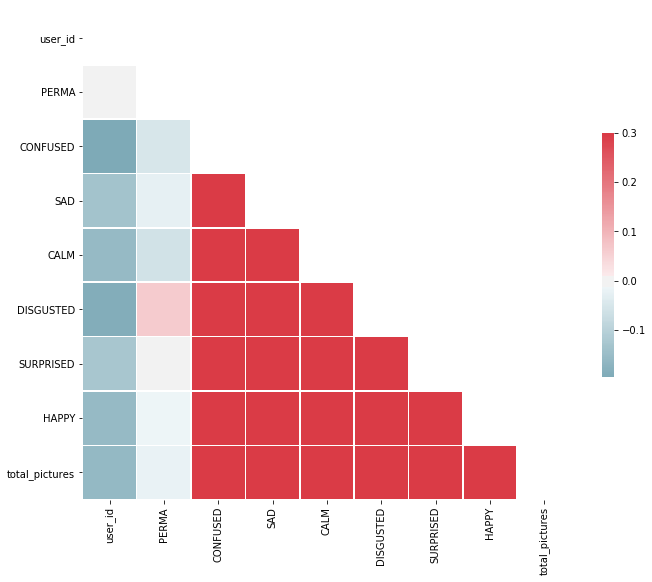

In [20]:
#correlation matrix
correlation_matrix = test.corr()

#PLOT THE CORRELATIONS TO Seaborn

mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure|
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

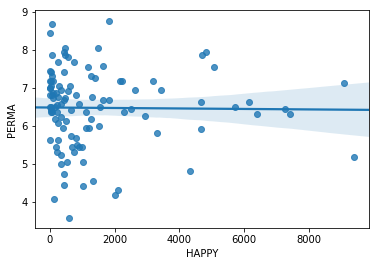

In [21]:
sns.regplot('HAPPY','PERMA',data=test)

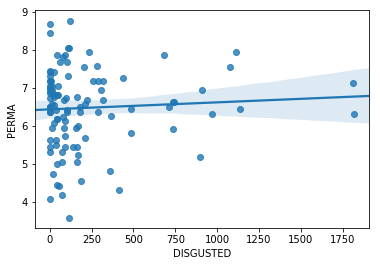

In [22]:
sns.regplot('DISGUSTED','PERMA',data=test)

In [48]:
import random
features = ['a','b','c','v']
a = ['a']
while True:
    temp = random.choice(features)
    if temp not in a:
        a.append(temp)
        features.remove(temp)
        break
#features.remove(random.choice(features))

In [49]:
a

['a', 'b']

In [50]:
temp

'b'

In [51]:
features


['a', 'c', 'v']